<a href="https://colab.research.google.com/github/Candida18/Detoxify/blob/main/Notebook/Detoxify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/hate_speech/hatespeech.csv')

In [ ]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
from nltk.util import pr
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df["labels"] = df["class"].map({0: "Hate Speech", 
                                    1: "Offensive Language", 
                                    2: "No Hate and Offensive"})

In [ ]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [ ]:
df["tweet"] = df["tweet"].apply(clean)

In [ ]:
df = df[["tweet", "class"]]

In [ ]:
df.head()

,tweet,class
0,rt mayasolov woman shouldnt complain clean ho...,2
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,1
2,rt urkindofbrand dawg rt ever fuck bitch sta...,1
3,rt cganderson vivabas look like tranni,1
4,rt shenikarobert shit hear might true might f...,1


<h1>Part 2:EDA of data</h1>

In [ ]:
df['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

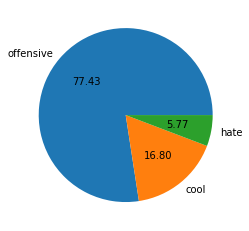

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.pie(df['class'].value_counts(), labels=['offensive','cool','hate'],autopct="%0.2f")
plt.show()

In [ ]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [ ]:
# check for duplicate values
df.duplicated().sum()


0

In [ ]:
df.isnull().sum()

tweet    0
class    0
dtype: int64

In [ ]:
df['num_characters'] = df['tweet'].apply(len)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# num of words
df['num_words'] = df['tweet'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df = df.drop(df[(df["num_words"]==0)].index)

In [ ]:
# df['num_sentences'] = df['tweet'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,tweet,class,num_characters,num_words
0,rt mayasolov woman shouldnt complain clean ho...,2,73,12
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,1,51,10
2,rt urkindofbrand dawg rt ever fuck bitch sta...,1,64,11
3,rt cganderson vivabas look like tranni,1,39,6
4,rt shenikarobert shit hear might true might f...,1,65,11


In [ ]:
df[['num_characters','num_words']].describe()

,num_characters,num_words
count,24591.000000,24591.000000
mean,49.119027,8.447603
std,23.176567,3.984661
min,3.000000,1.000000
25%,30.000000,5.000000
50%,46.000000,8.000000
75%,67.000000,11.000000
max,136.000000,25.000000


In [ ]:
# ham
df[df['class'] == 0][['num_characters','num_words']].describe()

,num_characters,num_words
count,1420.000000,1420.000000
mean,51.714085,8.618310
std,24.687646,4.212395
min,3.000000,1.000000
25%,31.000000,5.000000
50%,50.000000,8.000000
75%,71.000000,12.000000
max,119.000000,21.000000


In [ ]:
# Offensive
df[df['class'] == 1][['num_characters','num_words']].describe()

,num_characters,num_words
count,19050.000000,19050.000000
mean,47.595696,8.314541
std,22.440923,3.950274
min,3.000000,1.000000
25%,30.000000,5.000000
50%,45.000000,8.000000
75%,64.000000,11.000000
max,136.000000,24.000000


In [ ]:
# cool
df[df['class'] == 2][['num_characters','num_words']].describe()

,num_characters,num_words
count,4121.000000,4121.000000
mean,55.266683,9.003883
std,24.835614,4.012781
min,3.000000,1.000000
25%,35.000000,6.000000
50%,55.000000,9.000000
75%,75.000000,12.000000
max,135.000000,25.000000


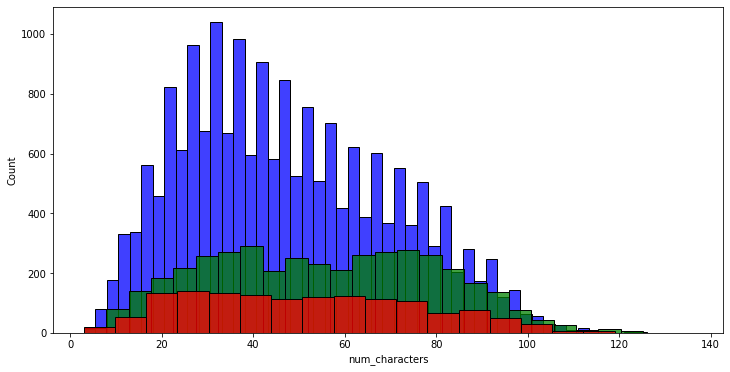

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['class'] == 1]['num_characters'],color='blue')
sns.histplot(df[df['class'] == 2]['num_characters'],color='green')
sns.histplot(df[df['class'] == 0]['num_characters'],color='red')

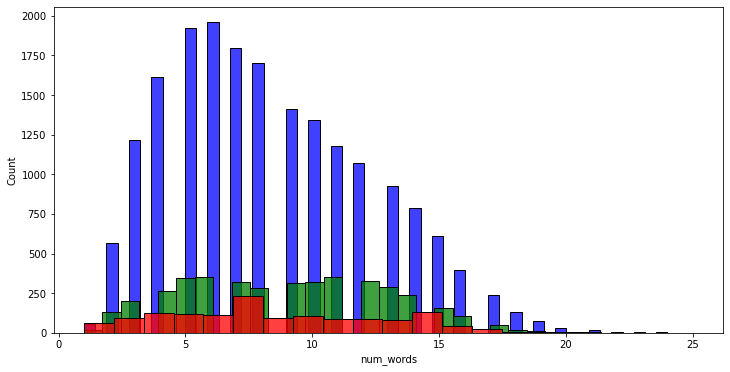

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['class'] == 1]['num_words'],color='blue')
sns.histplot(df[df['class'] == 2]['num_words'],color='green')
sns.histplot(df[df['class'] == 0]['num_words'],color='red')

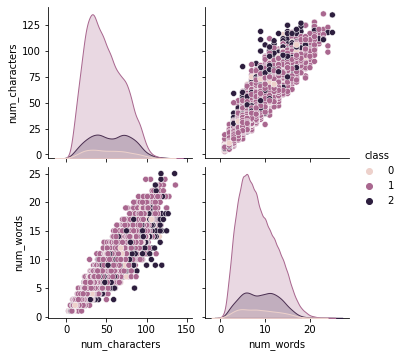

In [ ]:
sns.pairplot(df,hue='class')

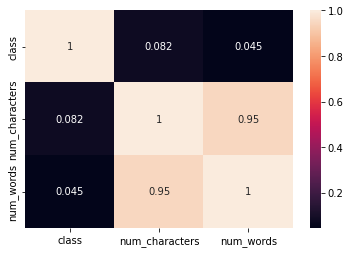

In [ ]:
sns.heatmap(df.corr(),annot=True)

<h1> Part 3: Natural Language Processing</h1>
<ol>
    <li>Lower case</li>
    <li>Tokenization</li>
    <li>Removing special characters</li>
    <li>Removing stop words and punctuation</li>
    <li>Stemming</li>
</ol>

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [ ]:
df['transformed_tweet'] = df['tweet'].apply(transform_text)

In [ ]:
df.head()

,tweet,class,num_characters,num_words,transformed_tweet
0,rt mayasolov woman shouldnt complain clean ho...,2,73,12,rt mayasolov woman shouldnt complain clean hou...
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,1,51,10,rt boy dat coldtyga dwn bad cuffin dat hoe place
2,rt urkindofbrand dawg rt ever fuck bitch sta...,1,64,11,rt urkindofbrand dawg rt ever fuck bitch start...
3,rt cganderson vivabas look like tranni,1,39,6,rt cganderson vivaba look like tranni
4,rt shenikarobert shit hear might true might f...,1,65,11,rt shenikarobert shit hear might true might fa...


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

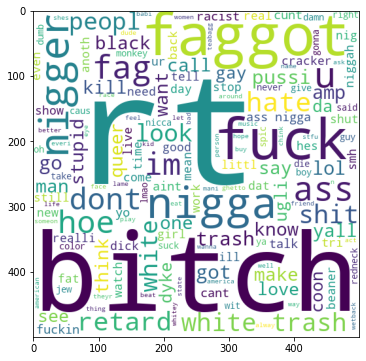

In [ ]:
spam_wc = wc.generate(df[df['class'] == 0]['tweet'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

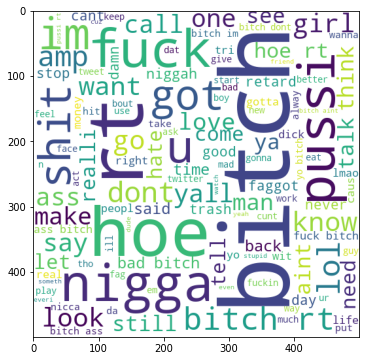

In [ ]:
spam_wc = wc.generate(df[df['class'] == 1]['tweet'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

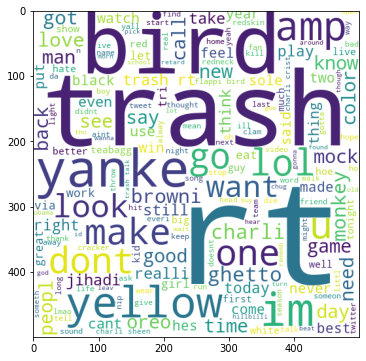

In [ ]:
spam_wc = wc.generate(df[df['class'] == 2]['tweet'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
hate_corpus = []
for msg in df[df['class'] == 0]['transformed_tweet'].tolist():
    for word in msg.split():
        hate_corpus.append(word)
        

len(hate_corpus)

12129

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


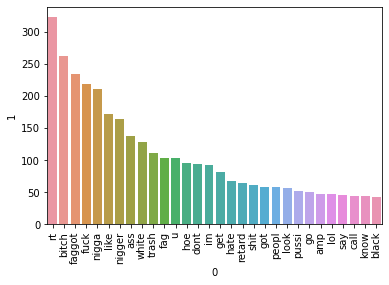

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(hate_corpus).most_common(30))[0],pd.DataFrame(Counter(hate_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
offensive_corpus = []
for msg in df[df['class'] == 1]['transformed_tweet'].tolist():
    for word in msg.split():
        offensive_corpus.append(word)
        

len(offensive_corpus)

157213

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


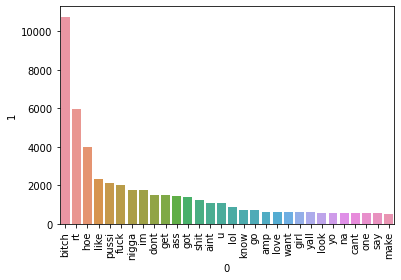

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(offensive_corpus).most_common(30))[0],pd.DataFrame(Counter(offensive_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
cool_corpus = []
for msg in df[df['class'] == 2]['transformed_tweet'].tolist():
    for word in msg.split():
        cool_corpus.append(word)
        

len(cool_corpus)

36888

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


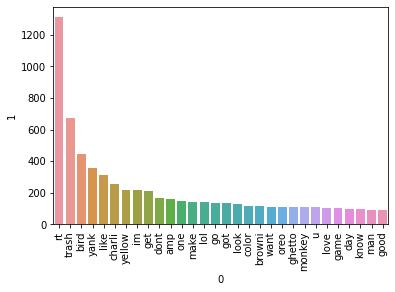

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(cool_corpus).most_common(30))[0],pd.DataFrame(Counter(cool_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

<h1>Part 4: Data Balancing and Model Building</h1>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer(max_features=5000)
tfidf = TfidfVectorizer(max_features=5000)

In [ ]:
X2 = cv.fit_transform(df['transformed_tweet']).toarray()
X2.shape

(24591, 5000)

In [ ]:
X = tfidf.fit_transform(df['transformed_tweet']).toarray()
X.shape

(24591, 5000)

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
df['class'].value_counts()

1    19050
2     4121
0     1420
Name: class, dtype: int64

In [ ]:
hatred=df[df["class"]==0]

In [ ]:
offence =df[df["class"]==1]

In [ ]:
nice=df[df["class"]==2]

In [ ]:
offence_sample = offence.sample(n=1420)
nice_sample = nice.sample(n=1420)

In [ ]:
from sklearn.utils import shuffle

In [ ]:
df_new = pd.concat([hatred,offence_sample,nice_sample],axis=0)
df_new = shuffle(df_new)

In [ ]:
df_new.head()

,tweet,class,num_characters,num_words,transformed_tweet
15976,rt kekepalm loud ghetto amp energet offens th...,1,70,12,rt kekepalm loud ghetto amp energet offen thin...
21850,smoke commerci blow like bitch yo fault yo chi...,1,81,13,smoke commerci blow like bitch yo fault yo chi...
14690,rt choochiee take bitch ever realli,1,35,6,rt choochie take bitch ever realli
16202,rt lifeask new orlean still trash,2,33,6,rt lifeask new orlean still trash
1747,u regular nig u play lol ima b ig day cou...,0,57,12,u regular nig u play lol ima b ig day count so...


In [ ]:
X = cv.fit_transform(df_new['transformed_tweet']).toarray()
y = df_new['class'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
pd.DataFrame(y_train).value_counts()

1    1153
2    1139
0    1116
dtype: int64

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'GNB' : gnb,
    'MNB' : mnb,
    'BNB' : bnb,
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'XGB':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,average='weighted') # try average='weighted' as well
    
    return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  GNB
Accuracy -  0.5176056338028169
Precision -  0.5493876947884286
For  MNB
Accuracy -  0.7370892018779343
Precision -  0.7469194807537581
For  BNB
Accuracy -  0.7535211267605634
Precision -  0.7629990475617484
For  SVC
Accuracy -  0.6115023474178404
Precision -  0.6096759312830768
For  KN
Accuracy -  0.6326291079812206
Precision -  0.6649993100894313
For  NB
Accuracy -  0.7370892018779343
Precision -  0.7469194807537581
For  DT
Accuracy -  0.6607981220657277
Precision -  0.7199631353804163
For  LR
Accuracy -  0.7699530516431925
Precision -  0.7698730825134121
For  RF
Accuracy -  0.755868544600939
Precision -  0.7545157867557458
For  AdaBoost
Accuracy -  0.7370892018779343
Precision -  0.7405983923654732
For  BgC
Accuracy -  0.7640845070422535
Precision -  0.7619846568369074
For  ETC
Accuracy -  0.7535211267605634
Precision -  0.7514610669504574
For  GBDT
Accuracy -  0.7535211267605634
Precision -  0.75562579068844
For  XGB
Accuracy -  0.7171361502347418
Precision -  0.73186069152

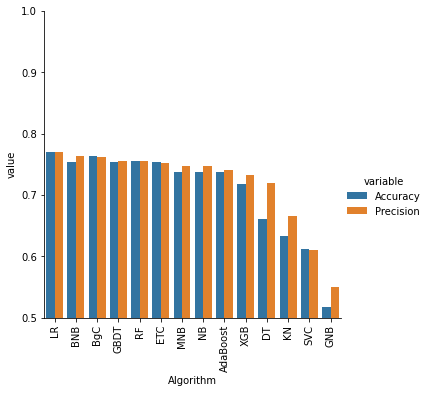

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('lr', lrc), ('rf', rfc),('etc',etc),('gbdt', gbdt)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('lr',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('gbdt',
                              GradientBoostingClassifier(n_estimators=50,
                                                         random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred,average='weighted'))

Accuracy 0.7723004694835681
Precision 0.7723004694835681


In [ ]:
estimators=[('svm', svc), ('lr', lrc), ('gbdt', gbdt),('etc',etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


In [ ]:
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred,average='weighted'))

Accuracy 0.7758215962441315
Precision 0.7738757044314243


In [ ]:
import pickle
pickle.dump(cv,open('/content/drive/MyDrive/data/hate_speech/vectorizer-4.pkl','wb'))
pickle.dump(clf,open('/content/drive/MyDrive/data/hate_speech/model-clf-4.pkl','wb'))
pickle.dump(voting,open('/content/drive/MyDrive/data/hate_speech/model-voting-4.pkl','wb'))

In [ ]:
for key,value in clfs.items():
  pickle.dump(value,open('/content/drive/MyDrive/data/hate_speech/model-'+key+'-4.pkl','wb'))